# Local PageRank

In [1]:
import networkx as nx
import math
import time
import datetime
import random
import operator
import numpy as np
import matplotlib.pyplot as plt

## Compute personalized pagerank (fast)
The function computePPRsFast implements the approximate iteration for computing the personalized pagerank values as in:

[1] Andersen, Chung, Lang. 2006. Local graph partitioning using pagerank vectors. http://www.leonidzhukov.net/hse/2015/networks/papers/andersen06localgraph.pdf

### Function

In [2]:
def computePPRsFast(g, c, start_n_id, epsilon):
    # input: g networkx graph
    # input: c damping factor
    # input: epsilon precision
    # input: start_n_id personalized PageRank node
    # output: ppr Personalized PageRank dictionary
    

    ppr = {start_n_id : 0.0}
    residual = {start_n_id : 1.0}
    n_id = start_n_id
    v_priority = residual[n_id]
    count_loops = 0

    while v_priority >= epsilon: 
        count_loops += 1
        if n_id in ppr:
            ppr[n_id] += (1 - c) * v_priority
        else:
            ppr[n_id] = (1 - c) * v_priority

        del residual[n_id]
        
        out_nodes = g.successors(n_id)
        for u_id in out_nodes:            
            if u_id in residual:
                residual[u_id] += (c * v_priority) / g.out_degree(n_id)
            else:
                residual[u_id] = (c * v_priority) / g.out_degree(n_id)

        residual = {k: v for k, v in sorted(residual.items(), key=lambda item: item[1], reverse=True)}

        n_id = list(residual.keys())[0]
        v_priority = residual[n_id]


    normalization = 0
    for k in ppr:
        normalization += ppr[k]

    for k in ppr:
        ppr[k] /= normalization

    return ppr, count_loops


### Example usage

In [3]:
g = nx.read_edgelist("./as20graph.txt",create_using=nx.DiGraph)

epsilon = 0.00005
start_n_id = '1'
c = 0.8
ppr, loops = computePPRsFast(g, c, start_n_id, epsilon)

print('personalized pageRanks relative to node \n', start_n_id)
print(' ')
print(ppr)

personalized pageRanks relative to node 
 1
 
{'1': 0.30422874234602404, '3': 0.0006889972556531458, '293': 0.004299190262772455, '174': 0.0026785395486206196, '286': 0.0024503394793664412, '701': 0.05087195024233158, '2828': 0.0047578165714494405, '2914': 0.007639418892924496, '3561': 0.016190795298792793, '209': 0.008684851517937901, '297': 0.001293175257707076, '1239': 0.02046076821808278, '2497': 0.002998292674687058, '3549': 0.006539399958075627, '7018': 0.011831270400473343, '1800': 0.0012350686442261366, '668': 0.0009413735461342635, '7170': 0.0018753685995281477, '5696': 0.002432370614324893, '1740': 0.004721602368414721, '2548': 0.008344766552040283, '2551': 0.0017178715293191607, '3356': 0.004540889321399123, '4006': 0.0010884445128918733, '6453': 0.0025384813626660803, '2685': 0.0012701511666191993, '1673': 0.0013283680056304806, '6113': 0.0010513581999637234, '6467': 0.0016663510554553963, '4200': 0.0019043026734829097, '2041': 0.001761887306464874, '4565': 0.00179480433174

In [15]:
cycle = []
num_node = []
times = []
g = nx.read_edgelist("./Wiki-Vote.txt",create_using=nx.DiGraph)

epsilon = 0.00005
start_n_id = '2092'
c = 0.8
start_time = time.time()
ppr, loops = computePPRsFast(g, c, start_n_id, epsilon)
end_time = time.time()

print('Loops ', loops)
print('Number of nodes', len(g))

cycle.append(loops)
num_node.append(len(g))
times.append(end_time - start_time)

Loops  1748
Number of nodes 7115


In [16]:
g = nx.read_edgelist("./twitter_combined.txt",create_using=nx.DiGraph)

epsilon = 0.00005
start_n_id = '17116707'
c = 0.8
start_time = time.time()
ppr, loops = computePPRsFast(g, c, start_n_id, epsilon)
end_time = time.time()

print('Loops ', loops)
print('Number of nodes', len(g))

cycle.append(loops)
num_node.append(len(g))
times.append(end_time - start_time)

Loops  9525
Number of nodes 81306


In [11]:
g = nx.read_edgelist("./Slashdot0902.txt",create_using=nx.DiGraph)

epsilon = 0.00005
start_n_id = '3'
c = 0.8
start_time = time.time()
ppr, loops = computePPRsFast(g, c, start_n_id, epsilon)
end_time = time.time()

print('Loops ', loops)
print('Number of nodes', len(g))

cycle.append(loops)
num_node.append(len(g))
times.append(end_time - start_time)

Loops  7969
Number of nodes 82168


In [13]:
g = nx.read_edgelist("./gplus_combined.txt",create_using=nx.DiGraph)

epsilon = 0.00005
start_n_id = '116766352265080910418'
c = 0.8
start_time = time.time()
ppr, loops = computePPRsFast(g, c, start_n_id, epsilon)
end_time = time.time()

print('Loops ', loops)
print('Number of nodes', len(g))

cycle.append(loops)
num_node.append(len(g))
times.append(end_time - start_time)

Loops  3161
Number of nodes 107614


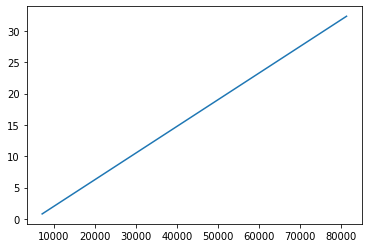

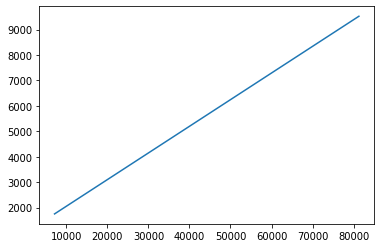

In [23]:
plt.plot(num_node, times)
plt.show()
plt.plot(num_node, cycle)

## Bidirectional algorithm

An alternative solution for the computation of pageRanks is via the FAST Biderection algorithm proposed in:
[2] Peter Lofgren, Siddhartha Banerjee, and Ashish Goel: Personalized PageRank Estimation and Search: A Bidirectional Approach. WSDM 2016 https://cs.stanford.edu/~plofgren/ or https://arxiv.org/abs/1507.05999

This algorithm uses a pagerank expression derived in:

[3] G. Jeh and J. Widom. Scaling personalized web search. In Proceedings of the 12th international conference on World Wide Web, pages 271{279. ACM, 2003. http://infolab.stanford.edu/~glenj/spws.pdf

and a mixing approch via backward iteration from the target node as proposed in:

[4] Andersen, Reid & Borgs, Christian & Chayes, Jennifer & Hopcroft, John & Mirrokni, Vahab & Teng, Shang-Hua. (2008). Local Computation of PageRank Contributions. Internet Mathematics. 5. 23-45. https://www.researchgate.net/publication/220465621_Local_Computation_of_PageRank_Contributions

followed by a MonteCarlo simulation of random walks to improve the estimation, see also:
[5] Peter Lofgren, Ashish Goel: Personalized PageRank to a Target Node. Technical Report 2013. https://cs.stanford.edu/~plofgren/ or https://arxiv.org/abs/1304.4658

### Functions

In [4]:
def approxContributionsBalanced(g, jump_prob, target_n_id, forward_seconds_r_max_ratio):
    
    #input: g networkx graph
    #input: jump_prob probability that the walk stops after each stop
    #input: target_n_id target node id 
    #input: forward_seconds_r_max_ratio expected time required for forward walks
    #output: estimates each value approximates ppr between node and target node, 
    #                   with additive error max residual
    #output: max residual
    #output: residuals
    
    start_time = time.time();
    nodes_by_residual = {}
    nodes_by_residual[target_n_id] = 1.0
    result_estimates = {}
 
    while (len(nodes_by_residual) is not 0 and time.time() - start_time < forward_seconds_r_max_ratio * max(nodes_by_residual.items(), key=operator.itemgetter(1))[1]):
        
        v_priority = max(nodes_by_residual.items(), key=operator.itemgetter(1))[1];
        v_id = max(nodes_by_residual.items(), key=operator.itemgetter(1))[0]
        nodes_by_residual.pop(max(nodes_by_residual.items(), key=operator.itemgetter(1))[0]);
        result_estimates[v_id] = result_estimates.get(v_id,0) + jump_prob * v_priority;
        
        in_degrees = g.predecessors(v_id)

        for u_id in in_degrees:
            residual_change = (1.0 - jump_prob) * v_priority / g.out_degree(u_id)
            nodes_by_residual[u_id] = nodes_by_residual.get(u_id,0) + residual_change
       

    result_max_residual =  0 if len(nodes_by_residual) is 0 else max(nodes_by_residual.items(), key=operator.itemgetter(1))[1]
    return (result_estimates,nodes_by_residual,result_max_residual)
  

In [5]:
def samplePersonalizedPageRank(g, jump_prob, start_n_id_v):
    
    #input: g networkx graph
    #input: jump_prob probability that the walk stops after each stop
    #input: start_n_id_v random start node id 
    #output: endpoint of the random walk from start node
    
    location_id = np.random.choice(start_n_id_v)
    
    while (np.random.random_sample() >= jump_prob):
        d = g.out_degree(location_id)
        if d > 0:
            out_degrees = list(g.successors(location_id))
            location_id = np.random.choice(out_degrees);
        else:
            #restart if reached dead end
            location_id = random.randrange(start_n_id_v);
     
    return location_id

In [6]:
def getPersonalizedPageRankBidirectional(g, jump_prob, start_n_id_v, target_n_id, min_probability = - 1.0, relative_error = 0.1, provable_relative_error = False, print_time_for_tuning = False):
    
    #input: g networkx graph
    #input: jump_prob probability that the walk stops after each stop
    #input: start_n_id start node id 
    #input: target_n_id target node id 
    #input: min probability on n node graph 1/n
    #input: relative error (approx) mean relative error
    #input: provable_relative_error if true, the result will with high probability have at most the given relative_error
    #input: print_time_for_tunning to see forward and reverse time
    #output: estimates each value approximates ppr between node and target node, 
    #                   with additive error max residual
    #output: max residual
    #output: residuals
    
    if (min_probability <= 0.0):
        min_probability = 1.0 / len(g.nodes())
  
    
    k_chernoff_constant = 0.7 if provable_relative_error else 12 * math.exp(1) * math.log(2 / 1.0e-9) #0.7 is empirical
    k_seconds_per_walk = 4.0e-7  #can be tuned so that forward and reverse running times are equal, to improve running time
    walk_count_r_max_ratio = k_chernoff_constant / (relative_error * relative_error) / min_probability
    forward_seconds_r_max_ratio = k_seconds_per_walk * walk_count_r_max_ratio


    start_time = time.time()

    estimates, residuals, max_residual = approxContributionsBalanced(g, jump_prob, target_n_id, forward_seconds_r_max_ratio)

    reverse_time = time.time() - start_time
    start_time = time.time()

    estimate = 0
    
    start_node_count = len(start_n_id_v) 
    for i in range(0, start_node_count):
        estimate += estimates.get(start_n_id_v[i], 0)/len(start_n_id_v)

    random_walk_count = int(walk_count_r_max_ratio * max_residual)

    for i in range(0, random_walk_count):
        v_id = samplePersonalizedPageRank(g, jump_prob, start_n_id_v)
        estimate += residuals.get(v_id, 0) / random_walk_count
      

    forward_time = time.time() - start_time

    if (print_time_for_tuning):
        print("Forward_time: ",forward_time,", reverse time: ",reverse_time)

    return estimate


In [7]:
def getRndWalkRestartBidirectional(g,jump_prob,start_n_id,target_n_id, min_probability = -1.0, relative_error = 0.1, prove_relative_error = False,print_time_for_tuning = False):
    return getPersonalizedPageRankBidirectional(g, jump_prob,[start_n_id], target_n_id, min_probability, relative_error, prove_relative_error, print_time_for_tuning)
  

In [8]:
def basicUsage(g):
    print("\nRandom Walk with Restart (Personalized PageRank) from node 1 to node 3: \n",
             getRndWalkRestartBidirectional(g, 0.2, '1','3'))
    print("Personalized PageRank from start uniformly sampled from [1, 3] to node 6: \n",
             getPersonalizedPageRankBidirectional(g, 0.2, ['1', '3'], '6'));


def showForwardReverseTimeForTuning(g):
    pair_count = 2;
  
    start_time = time.time()
    for i in range(0, pair_count):
        start_id = np.random.choice(g.nodes())
        target_id = np.random.choice(g.nodes())
        print("PPR from node",start_id,"to node",target_id,"is",getPersonalizedPageRankBidirectional(g, 0.2, [start_id], target_id, 0.1, 4.0 / len(g.nodes()), False, True));
    end_time = time.time()
    print("Total time for",pair_count,"pairs: ", end_time-start_time, "seconds.")


### Example usage

In [9]:
g=nx.read_edgelist("./as20graph.txt",create_using=nx.DiGraph)
basicUsage(g)
showForwardReverseTimeForTuning(g)



Random Walk with Restart (Personalized PageRank) from node 1 to node 3: 
 0.0006146239429696878
Personalized PageRank from start uniformly sampled from [1, 3] to node 6: 
 0.0003729210353664546
Forward_time:  25.537955045700073 , reverse time:  0.1718273162841797
PPR from node 11264 to node 1482 is 2.882243527006191e-06
Forward_time:  69.09605264663696 , reverse time:  0.8555066585540771
PPR from node 3218 to node 10587 is 3.4720020380477485e-06
Total time for 2 pairs:  95.67697048187256 seconds.
